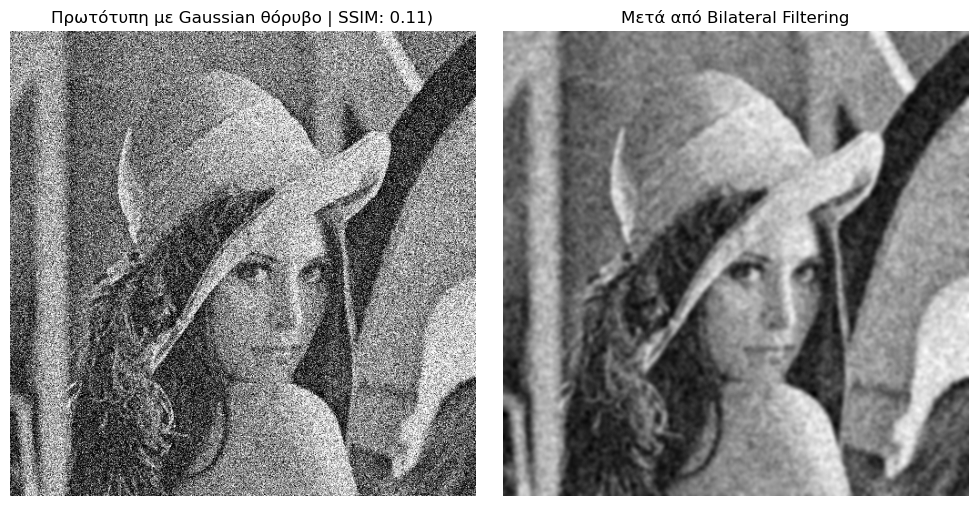

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFilter, Image
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Loading the image
img = Image.open('lenna-n1.jpg').convert('L')

# Bilateral Filtering
filtered = img.filter(ImageFilter.GaussianBlur(radius=2))

img_array = np.array(img)
filtered_array = np.array(filtered)

# Calculate SSIM
image1_ssim = ssim(img_array, filtered_array, data_range=img_array.max() - img_array.min())

# Before and after filtering
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title(f"Πρωτότυπη με Gaussian θόρυβο | SSIM: {image1_ssim:.2f})")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Μετά από Bilateral Filtering")
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



(-0.5, 511.5, 511.5, -0.5)

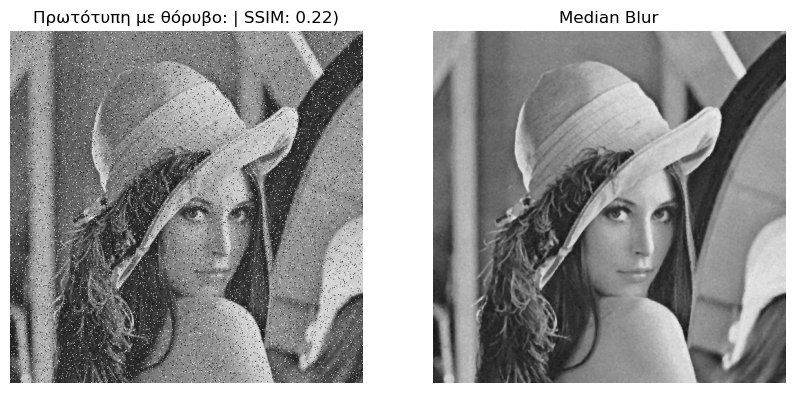

In [2]:
# Load the image
img = cv2.imread('lenna-n2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median blur
filtered = cv2.medianBlur(img, 3)

img_array = np.array(img)
filtered_array = np.array(filtered)

# Calculate SSIM
image1_ssim = ssim(img_array, filtered_array, data_range=img_array.max() - img_array.min())

# Showing before and after filtering
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title(f"Πρωτότυπη με θόρυβο: | SSIM: {image1_ssim:.2f})")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median Blur")
plt.imshow(filtered, cmap='gray')
plt.axis('off')

